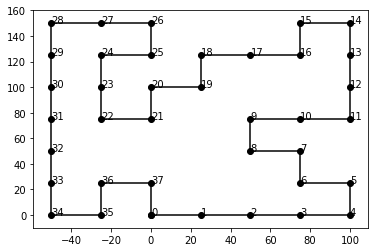

Horizontal chords before collinear vertices =  [(6, 37), (9, 21)]
vertical_chords =  [(21, 37), (22, 36)]


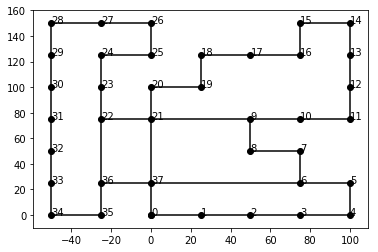

horizontal_chords =  [(6, 37), (9, 21), (12, 19), (13, 16), (29, 24), (31, 22), (32, 8), (33, 36)]
vertical_chords =  [(21, 37), (22, 36), (1, 19), (2, 8), (3, 6), (10, 16), (17, 9), (27, 24)]


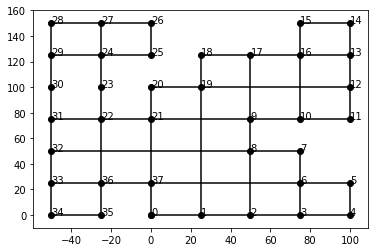

In [20]:
'Please make sure that the INPUT is A CLOSED RECTILINEAR POLYGON,'
'CONSTRUCTED WHILE GOING IN ANTI-CLOCKWISE ONLY'
# importing libraries
import networkx as nx
import turtle
import matplotlib.pyplot as plt
import warnings
from networkx.algorithms import bipartite
import math

warnings.filterwarnings("ignore")
# declaration list
wn = turtle.Screen()
# a turtle called gopu 
gopu = turtle.Turtle() 
# co-ordinate points
x = [] 
y = []
# vertex-type := rectilinear = -1; convex = 0; concave = 1 
vertex_type = [] 
# store the bipartite graph of chords
G = nx.Graph()
# the line below can be commented if one needs animation
gopu.speed(0)
# starts recording keys being pressed
gopu.begin_poly()

# Event handlers
stride = 25
# Up  = up() - vertex to be deleted = -1
def up():
    vertex_type.append(-1)
    gopu.forward(stride)
 
# left = left() ; make vertex - convex = 0
def left():
    vertex_type.append(0)
    gopu.setheading(gopu.heading()+90)
    gopu.forward(stride)
 
# right = right() ; make vertex - concave = 1
def right():
    vertex_type.append(1)
    gopu.setheading(gopu.heading()-90)
    gopu.forward(stride)
 
# back = back() -- doing undo is allowed only once.
def back():
    vertex_type.pop()
    gopu.undo()

# quits the screen and outputs the plots the partitioned polygon
def partition_polygon():
    # closing the screen
    wn.bye()
    # stopped recording the polygon
    gopu.end_poly()
    p = gopu.get_poly()
    p = list(p)
    compute_partition(p)  
    
'''
The movements of the turtle are recorded and the rectilinear graph thus 
obtained is converted into bipartite graph of chords
'''
def compute_partition(p):
    # p now contains the list of coordinates of vertices
    # last one is same as the origin
    # and the origin is always going to be a convex vertex
    p.pop()
    vertex_type[0] = 0
    
    # x and y contain list of x and y coordinates respectively
    for i,j in p:
        x.append(i)
        y.append(j)

    # this is done as there are some very small errors in recording the 
    # position by the turtle library
    for i in range(len(x)):
        x[i] = int(x[i])
        y[i] = int(y[i])

    for i in range(len(x)):
        if x[i] % stride != 0:
            x[i] += (stride - x[i] % stride)
        if y[i] % stride != 0:
            y[i] += (stride - y[i] % stride)
    
    collinear_vertices = [i for i,val in enumerate(vertex_type) if val == -1]
    # finding the chords inside the polygon
    horizontal_chords = []
    vertical_chords = []
    concave_vertices = [i for i,val in enumerate(vertex_type) if val == 1]

    # middles is used because, there are cases when there is a chord between vertices
    # and they intersect with external chords, hence if there is any vertex in between 
    # two vertices then skip that chord. 
    for i in range(len(concave_vertices)):
        for j in range(i+1,len(concave_vertices)):
            if concave_vertices[j] != concave_vertices[i] + 1:
                middles = []
                if y[concave_vertices[i]] == y[concave_vertices[j]]:
                    for k in range(len(x)):
                        if y[concave_vertices[i]] == y[k] and (x[concave_vertices[i]] < x[k] and x[concave_vertices[j]] > x[k] \
                                                              or x[concave_vertices[i]] > x[k] and x[concave_vertices[j]] < x[k]):
                            middles.append(k)
                    if len(middles) == 0:
                        horizontal_chords.append((concave_vertices[i],concave_vertices[j]))
                middles = []
                if x[concave_vertices[i]] == x[concave_vertices[j]]:
                    for k in range(len(x)):
                        if x[concave_vertices[i]] == x[k] and (y[concave_vertices[i]] < y[k] and y[concave_vertices[j]] > y[k] \
                                                              or y[concave_vertices[i]] > y[k] and y[concave_vertices[j]] < y[k]):
                            middles.append(k)
                    if len(middles) == 0:
                        vertical_chords.append((concave_vertices[i],concave_vertices[j]))
            

    
    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    plt.show()
    plt.clf()
    print("Horizontal chords before collinear vertices = ", horizontal_chords)
    print("vertical_chords = ", vertical_chords)

    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    for i,j in horizontal_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    for i,j in vertical_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]], color='black')
    plt.show()
    plt.clf()
    for i in range(len(collinear_vertices)):
        for j in range(len(concave_vertices)):
            middles = []
            if y[collinear_vertices[i]] == y[concave_vertices[j]]:
                if collinear_vertices[i] < concave_vertices[j]:
                    for k in range(len(x)):
                        if y[k] == y[collinear_vertices[i]] and (x[k] < x[concave_vertices[j]] \
                            and x[k] > x[collinear_vertices[i]] or x[k] > x[concave_vertices[j]] \
                            and x[k] < x[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i]+1 == concave_vertices[j]:
                        middles.append(0)
                else:
                    for k in range(len(x)):
                        if y[k] == y[collinear_vertices[i]] and (x[k] > x[concave_vertices[j]] \
                            and x[k] < x[collinear_vertices[i]] or x[k] < x[concave_vertices[j]] \
                            and x[k] > x[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i] == concave_vertices[j]+1:
                        middles.append(0)
                if len(middles) == 0:
                    horizontal_chords.append((collinear_vertices[i],concave_vertices[j]))
            middles = []
            if x[collinear_vertices[i]] == x[concave_vertices[j]]:
                if collinear_vertices[i] < concave_vertices[j]:
                    for k in range(len(x)):
                        if x[k] == x[collinear_vertices[i]] and (y[k] < y[concave_vertices[j]] \
                            and y[k] > y[collinear_vertices[i]] or y[k] > y[concave_vertices[j]] \
                            and y[k] < y[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i]+1 == concave_vertices[j]:
                        middles.append(0)
                else:
                    for k in range(len(x)):
                        if x[k] == x[collinear_vertices[i]] and (y[k] > y[concave_vertices[j]] \
                            and y[k] < y[collinear_vertices[i]] or y[k] < y[concave_vertices[j]] \
                            and y[k] > y[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i] == concave_vertices[j]+1:
                        middles.append(0)
                if len(middles) == 0:
                    vertical_chords.append((collinear_vertices[i],concave_vertices[j]))
    
    # displaying all attributes and important parameters involved
#     print("p = ",p)
#     print("vertex_Type = ",vertex_type)
#     print ("x = ", x)
#     print ("y = ", y)
#     print("collinear_vertices = ", collinear_vertices)
#     print("concave_vertices =", concave_vertices)
    print("horizontal_chords = " ,horizontal_chords)
    print("vertical_chords = ",vertical_chords)
    # drawing the partitioned polygon 
    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    for i,j in horizontal_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    for i,j in vertical_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    plt.show()

# Defining the keys function
wn.onkey(up, "Up")
wn.onkey(left, "Left")
wn.onkey(right, "Right")
wn.onkey(back, "Down")
wn.onkey(partition_polygon, "Escape")
wn.listen()
wn.mainloop()


In [51]:
import matplotlib.pyplot as plt
y=[2.56422, 3.77284,3.52623,3.51468,3.02199]
z=[0.15, 0.3, 0.45, 0.6, 0.75]
n=[58,651,393,203,123]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))
#         plt.show()

In [ ]:
from matplotlib import cm


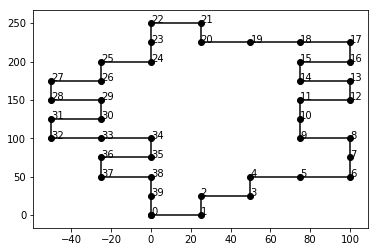

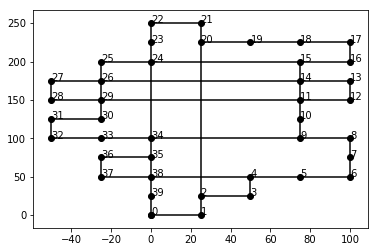

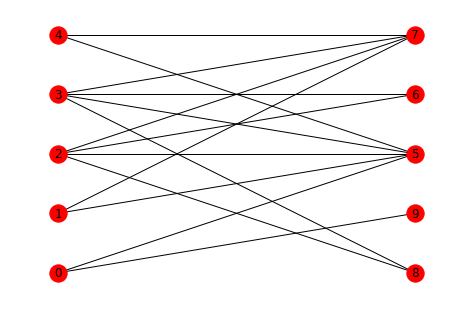

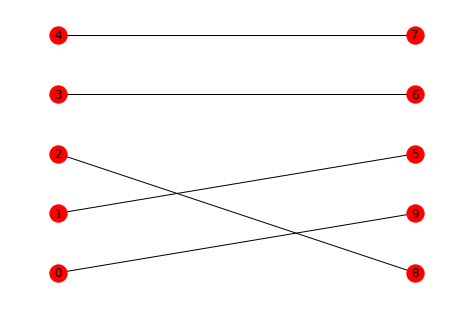

free_vertices =  []
maximum matching =  [(0, 9), (1, 5), (2, 8), (3, 6), (4, 7)]
H =  {0, 1, 2, 3, 4}
V =  {8, 9, 5, 6, 7}
p =  [(0.00,0.00), (25.00,0.00), (25.00,25.00), (50.00,25.00), (50.00,50.00), (75.00,50.00), (100.00,50.00), (100.00,75.00), (100.00,100.00), (75.00,100.00), (75.00,125.00), (75.00,150.00), (100.00,150.00), (100.00,175.00), (75.00,175.00), (75.00,200.00), (100.00,200.00), (100.00,225.00), (75.00,225.00), (50.00,225.00), (25.00,225.00), (25.00,250.00), (0.00,250.00), (-0.00,225.00), (-0.00,200.00), (-25.00,200.00), (-25.00,175.00), (-50.00,175.00), (-50.00,150.00), (-25.00,150.00), (-25.00,125.00), (-50.00,125.00), (-50.00,100.00), (-25.00,100.00), (-0.00,100.00), (-0.00,75.00), (-25.00,75.00), (-25.00,50.00), (-0.00,50.00), (-0.00,25.00)]
vertex_Type =  [0, 0, 1, 0, 1, -1, 0, -1, 0, 1, -1, 1, 0, 0, 1, 1, 0, 0, -1, -1, 1, 0, 0, -1, 1, 0, 1, 0, 0, 1, 1, 0, 0, -1, 1, 1, 0, 0, 1, -1]
x =  [0, 25, 25, 50, 50, 75, 100, 100, 100, 75, 75, 75, 100, 100, 75, 75, 100, 100, 75

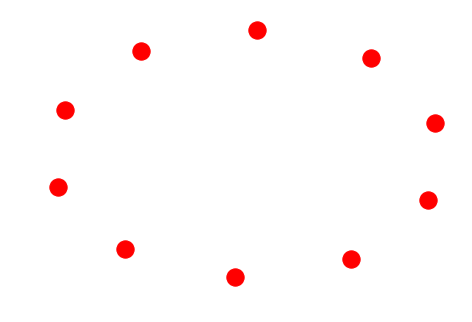

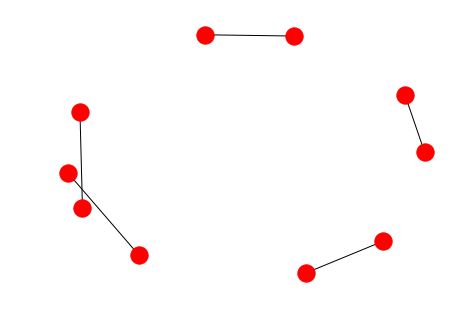

maximum independent =  [4, 1, 3, 2, 0]
Unmatched concave vertices [2, 20, 30, 35]
nearest_chord [(2, 25), (20, -25), (30, -25), (35, -25)]


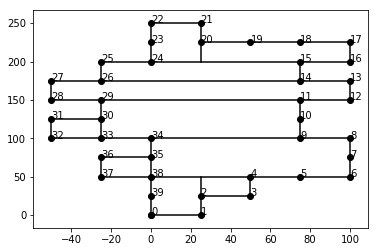

In [38]:
'Please make sure that the INPUT is A CLOSED RECTILINEAR POLYGON,'
'CONSTRUCTED WHILE GOING IN ANTI-CLOCKWISE ONLY'
# importing libraries
import networkx as nx
import turtle
import matplotlib.pyplot as plt
import warnings
from networkx.algorithms import bipartite
import math
import sys

warnings.filterwarnings("ignore")
# declaration list
wn = turtle.Screen()
# a turtle called gopu 
gopu = turtle.Turtle() 
# co-ordinate points
x = [] 
y = []
# vertex-type := rectilinear = -1; convex = 0; concave = 1 
vertex_type = [] 
# store the bipartite graph of chords
G = nx.Graph()
# the line below can be commented if one needs animation
gopu.speed(0)
# starts recording keys being pressed
gopu.begin_poly()

# Event handlers
stride = 25
# Up  = up() - vertex to be deleted = -1
def up():
    vertex_type.append(-1)
    gopu.forward(stride)
 
# left = left() ; make vertex - convex = 0
def left():
    vertex_type.append(0)
    gopu.setheading(gopu.heading()+90)
    gopu.forward(stride)
 
# right = right() ; make vertex - concave = 1
def right():
    vertex_type.append(1)
    gopu.setheading(gopu.heading()-90)
    gopu.forward(stride)
 
# back = back() -- doing undo is allowed only once.
def back():
    vertex_type.pop()
    gopu.undo()

# quits the screen and outputs the plots the partitioned polygon
def partition_polygon():
    # closing the screen
    wn.bye()
    # stopped recording the polygon
    gopu.end_poly()
    p = gopu.get_poly()
    p = list(p)
    compute_partition(p)  
    
'''
The movements of the turtle are recorded and the rectilinear graph thus 
obtained is converted into bipartite graph of chords
'''
def compute_partition(p):
    # p now contains the list of coordinates of vertices
    # last one is same as the origin
    # and the origin is always going to be a convex vertex
    if len(p) == 0:
        print("No input")
        sys.exit()
    p.pop()
    vertex_type[0] = 0
    
    # x and y contain list of x and y coordinates respectively
    for i,j in p:
        x.append(i)
        y.append(j)

    # this is done as there are very small errors in recording the 
    # position accurately by the turtle library
    for i in range(len(x)):
        x[i] = int(x[i])
        y[i] = int(y[i])

    for i in range(len(x)):
        if x[i] % stride != 0:
            x[i] += (stride - x[i] % stride)
        if y[i] % stride != 0:
            y[i] += (stride - y[i] % stride)
    
    # deleting vertices that are on a straight line
    collinear_vertices = [i for i,val in enumerate(vertex_type) if val == -1] 
    # Reverse order deletion is done so that the previous index does not 
    # overthrow the current one

    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    plt.show()
    plt.clf()
    # finding the chords inside the polygon
    horizontal_chords = []
    vertical_chords = []
    concave_vertices = [i for i,val in enumerate(vertex_type) if val == 1]

    # middles is used because, there are cases when there is a chord between vertices
    # and they intersect with external chords, hence if there is any vertex in between 
    # two vertices then skip that chord. 
    for i in range(len(concave_vertices)):
        for j in range(i+1,len(concave_vertices)):
            if concave_vertices[j] != concave_vertices[i] + 1:
                middles = []
                if y[concave_vertices[i]] == y[concave_vertices[j]]:
                    for k in range(len(x)):
                        if y[concave_vertices[i]] == y[k] and (x[concave_vertices[i]] < x[k] and x[concave_vertices[j]] > x[k] \
                                                              or x[concave_vertices[i]] > x[k] and x[concave_vertices[j]] < x[k]):
                            middles.append(k)
                    if len(middles) == 0:
                        horizontal_chords.append((concave_vertices[i],concave_vertices[j]))
                middles = []
                if x[concave_vertices[i]] == x[concave_vertices[j]]:
                    for k in range(len(x)):
                        if x[concave_vertices[i]] == x[k] and (y[concave_vertices[i]] < y[k] and y[concave_vertices[j]] > y[k] \
                                                              or y[concave_vertices[i]] > y[k] and y[concave_vertices[j]] < y[k]):
                            middles.append(k)
                    if len(middles) == 0:
                        vertical_chords.append((concave_vertices[i],concave_vertices[j]))
    
    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    for i,j in horizontal_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    for i,j in vertical_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]], color='black')
    plt.show()
    plt.clf()
    # Creating a bipartite graph from the set of chords
    for i,h in enumerate(horizontal_chords):
        y1 = y[h[0]]
        x1 = min(x[h[0]] ,x[h[1]] )
        x2 = max(x[h[0]] ,x[h[1]])
        G.add_node(i, bipartite=0)
        for j,v in enumerate(vertical_chords):
            x3 = x[v[0]]
            y3 = min(y[v[0]],y[v[1]])
            y4 = max(y[v[0]],y[v[1]])
            G.add_node(j + len(horizontal_chords),bipartite=0)
            if x1 <= x3 and x3 <=x2 and y3 <= y1 and y1 <= y4:    
                G.add_edge(i, j + len(horizontal_chords))
    
    if len(horizontal_chords) == 0:
        for j,v in enumerate(vertical_chords):
            x3 = x[v[0]]
            y3 = min(y[v[0]],y[v[1]])
            y4 = max(y[v[0]],y[v[1]])
            G.add_node(j,bipartite=1)
    
    # finding the maximum matching of the bipartite graph, G.
    M = nx.Graph()
    maximum_matching = nx.bipartite.maximum_matching(G)
    maximum_matching_list = []
    for i,j in maximum_matching.items():
        maximum_matching_list += [(i,j)]
    M.add_edges_from(maximum_matching_list)
    maximum_matching = M.edges()
    # breaking up into two sets
    H, V = bipartite.sets(G)
    pos = dict()
    pos.update((n, (1, i)) for i, n in enumerate(H))
    pos.update((n,(2,i)) for i, n in enumerate(V))
    nx.draw(G, pos=pos, with_labels = True)
    plt.show()
    plt.gcf().clear()
    
#     plotting the maximum matching of the bipartite graph
    K = nx.Graph()
    K.add_nodes_from(H, bipartite=0)
    K.add_nodes_from(V, bipartite=1)
    K.add_edges_from(maximum_matching)
    nx.draw(K, pos=pos, with_labels = True)
    plt.show()
    plt.gcf().clear()
    free_vertices = []
    for u in H:
        temp = []
        for v in V:
            if (u,v) in maximum_matching or (v,u) in maximum_matching:
                temp += [v]
        if len(temp) == 0:
            free_vertices += [u]
    for u in V:
        temp = []
        for v in H:
            if (u,v) in maximum_matching or (v,u) in maximum_matching:
                temp += [v]
        if len(temp) == 0:
            free_vertices += [u]
            
    print("free_vertices = ", free_vertices)
    print("maximum matching = ", maximum_matching)
    print("H = ", H)
    print("V = ", V)
    # finding the maximum independent set
    max_independent = []
    while len(free_vertices) != 0 or len(maximum_matching) != 0:
        if len(free_vertices) != 0 :
            u = free_vertices.pop()
            max_independent += [u]
        else:
            u, v = maximum_matching.pop()
            G.remove_edge(u,v)
            max_independent += [u]

        for v in G.neighbors(u):
            G.remove_edge(u, v)
            for h in G.nodes():
                if (v,h) in maximum_matching:
                    maximum_matching.remove((v,h))
                    free_vertices += [h]
                if (h,v) in maximum_matching:
                    maximum_matching.remove((h,v))
                    free_vertices += [h]

    
    # displaying all attributes and important parameters involved
    print("p = ",p)
    print("vertex_Type = ",vertex_type)
    print ("x = ", x)
    print ("y = ", y)
    print("collinear_vertices = ", collinear_vertices)
    print("concave_vertices =", concave_vertices)
    print("horizontal_chords = " ,horizontal_chords)
    print("vertical_chords = ",vertical_chords)
    nx.draw(G)
    plt.show()
    plt.gcf().clear()
    nx.draw(M)
    plt.show()
    plt.gcf().clear()
    print("maximum independent = ", max_independent)

    # drawing the partitioned polygon 
    ind_chords = []
    for i in max_independent:
        if (i >= len(horizontal_chords)):
            ind_chords += [vertical_chords[i-len(horizontal_chords)]]
        else:
            ind_chords += [horizontal_chords[i]]
    unmatched_concave_vertices = [i for i in concave_vertices]
    for i,j in ind_chords:
        if i in unmatched_concave_vertices:
            unmatched_concave_vertices.remove(i)
        if j in unmatched_concave_vertices:
            unmatched_concave_vertices.remove(j)
    
    print("Unmatched concave vertices", unmatched_concave_vertices)
    nearest_chord = []
    for i in unmatched_concave_vertices:
        dist = 0
        nearest_distance = math.inf
        for j in max_independent:
            if j < len(horizontal_chords):
                temp1, temp2 = horizontal_chords[j]
                if abs(y[i] - y[temp1]) < nearest_distance and \
                (x[i] <= x[temp1] and x[i] >= x[temp2] or x[i] >= x[temp1] and x[i] <= x[temp2]) \
                and abs(temp1 - i) != 1 and abs(temp2 - i) != 1:
                    middles = []
                    for u in range(len(x)):
                        if x[i] == x[u] and (y[i] < y[u] and y[u] < y[temp1] or y[temp1] < y[u] and y[u] < y[i]):
                            middles.append(u)
                    if len(middles) == 0:
                        nearest_distance = abs(y[i] - y[temp1])
                        dist = y[temp1] - y[i]

        if nearest_distance != math.inf:
            nearest_chord.append((i,dist)) 
        else:
            for k in collinear_vertices:
                if x[k] == x[i] and abs(y[k] - y[i]) < nearest_distance and abs(k-i) != 1:
                    middles = []
                    for u in range(len(x)):
                        if x[i] == x[u] and (y[i] < y[u] and y[u] < y[k] or y[k] < y[u] and y[u] < y[i]):
                            middles.append(u)
                    if len(middles) == 0:
                        nearest_distance = abs(y[i] - y[k])
                        dist = y[k] - y[i]
            nearest_chord.append((i,dist)) 
     
    print("nearest_chord", nearest_chord)
    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    for i,j in ind_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    for i,dist in nearest_chord:
        ax.plot([x[i],x[i]],[y[i], y[i]+dist],color='black')
    plt.show()

# Defining the keys function
wn.onkey(up, "Up")
wn.onkey(left, "Left")
wn.onkey(right, "Right")
wn.onkey(back, "Down")
wn.onkey(partition_polygon, "Escape")
wn.listen()

wn.mainloop()

Initial input rectillinear graph


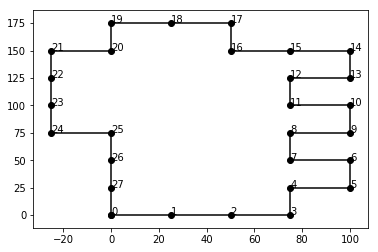

collinear_vertices =  [1, 2, 15, 18, 22, 23, 26, 27]
concave_vertices = [4, 7, 8, 11, 12, 16, 20, 25]
horizontal_chords =  [(8, 25), (16, 20), (22, 12), (23, 11), (26, 7), (27, 4)]
vertical_chords =  [(4, 7), (8, 11), (20, 25), (2, 16), (15, 12)]
The maximum partitioned rectillinear polygon


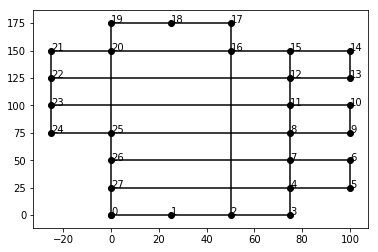

The minimum partitioned rectillinear polygon


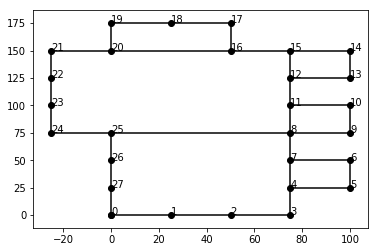

In [40]:
'Please make sure that the INPUT is A CLOSED RECTILINEAR POLYGON,'
'CONSTRUCTED WHILE GOING IN ANTI-CLOCKWISE ONLY'
# importing libraries
import networkx as nx
import turtle
import matplotlib.pyplot as plt
import warnings
from networkx.algorithms import bipartite
import math

warnings.filterwarnings("ignore")
# declaration list
wn = turtle.Screen()
# a turtle called gopu 
gopu = turtle.Turtle() 
# co-ordinate points
x = [] 
y = []
# vertex-type := rectilinear = -1; convex = 0; concave = 1 
vertex_type = [] 
# store the bipartite graph of chords
G = nx.Graph()
# the line below can be commented if one needs animation
gopu.speed(0)
# starts recording keys being pressed
gopu.begin_poly()

# Event handlers
stride = 25
# Up  = up() - vertex to be deleted = -1
def up():
    vertex_type.append(-1)
    gopu.forward(stride)
 
# left = left() ; make vertex - convex = 0
def left():
    vertex_type.append(0)
    gopu.setheading(gopu.heading()+90)
    gopu.forward(stride)
 
# right = right() ; make vertex - concave = 1
def right():
    vertex_type.append(1)
    gopu.setheading(gopu.heading()-90)
    gopu.forward(stride)
 
# back = back() -- doing undo is allowed only once.
def back():
    vertex_type.pop()
    gopu.undo()

# quits the screen and outputs the plots the partitioned polygon
def partition_polygon():
    # closing the screen
    wn.bye()
    # stopped recording the polygon
    gopu.end_poly()
    p = gopu.get_poly()
    p = list(p)
    compute_partition(p)  
    
'''
The movements of the turtle are recorded and the rectilinear polygon thus 
obtained is converted into bipartite graph of chords
'''
def compute_partition(p):
    # p now contains the list of coordinates of vertices
    # last one is same as the origin
    # and the origin is always going to be a convex vertex
    p.pop()
    vertex_type[0] = 0
    
    # x and y contain list of x and y coordinates respectively
    for i,j in p:
        x.append(i)
        y.append(j)

    # this is done as there are some very small errors in recording the 
    # position by the turtle library
    for i in range(len(x)):
        x[i] = int(x[i])
        y[i] = int(y[i])

    for i in range(len(x)):
        if x[i] % stride != 0:
            x[i] += (stride - x[i] % stride)
        if y[i] % stride != 0:
            y[i] += (stride - y[i] % stride)

    # separating concave and collinear vertices
    collinear_vertices = [i for i,val in enumerate(vertex_type) if val == -1]
    concave_vertices = [i for i,val in enumerate(vertex_type) if val == 1]
    
    # finding the chords inside the polygon
    horizontal_chords = []
    vertical_chords = []

    # middles is used because, there are cases when there is a chord between vertices
    # and they intersect with external chords, hence if there is any vertex in between 
    # two vertices then skip that chord. 
    for i in range(len(concave_vertices)):
        for j in range(i+1,len(concave_vertices)):
            if concave_vertices[j] != concave_vertices[i] + 1:
                middles = []
                if y[concave_vertices[i]] == y[concave_vertices[j]]:
                    for k in range(len(x)):
                        if y[concave_vertices[i]] == y[k] and (x[concave_vertices[i]] < x[k] and x[concave_vertices[j]] > x[k] \
                                                              or x[concave_vertices[i]] > x[k] and x[concave_vertices[j]] < x[k]):
                            middles.append(k)
                    if len(middles) == 0:
                        horizontal_chords.append((concave_vertices[i],concave_vertices[j]))
                middles = []
                if x[concave_vertices[i]] == x[concave_vertices[j]]:
                    for k in range(len(x)):
                        if x[concave_vertices[i]] == x[k] and (y[concave_vertices[i]] < y[k] and y[concave_vertices[j]] > y[k] \
                                                              or y[concave_vertices[i]] > y[k] and y[concave_vertices[j]] < y[k]):
                            middles.append(k)
                    if len(middles) == 0:
                        vertical_chords.append((concave_vertices[i],concave_vertices[j]))
            

    temp_hori = horizontal_chords[:]
    temp_verti = vertical_chords[:]

    for i in range(len(collinear_vertices)):
        for j in range(len(concave_vertices)):
            middles = []
            if y[collinear_vertices[i]] == y[concave_vertices[j]]:
                if collinear_vertices[i] < concave_vertices[j]:
                    for k in range(len(x)):
                        if y[k] == y[collinear_vertices[i]] and (x[k] < x[concave_vertices[j]] \
                            and x[k] > x[collinear_vertices[i]] or x[k] > x[concave_vertices[j]] \
                            and x[k] < x[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i]+1 == concave_vertices[j]:
                        middles.append(0)
                else:
                    for k in range(len(x)):
                        if y[k] == y[collinear_vertices[i]] and (x[k] > x[concave_vertices[j]] \
                            and x[k] < x[collinear_vertices[i]] or x[k] < x[concave_vertices[j]] \
                            and x[k] > x[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i] == concave_vertices[j]+1:
                        middles.append(0)
                if len(middles) == 0:
                    horizontal_chords.append((collinear_vertices[i],concave_vertices[j]))
            middles = []
            if x[collinear_vertices[i]] == x[concave_vertices[j]]:
                if collinear_vertices[i] < concave_vertices[j]:
                    for k in range(len(x)):
                        if x[k] == x[collinear_vertices[i]] and (y[k] < y[concave_vertices[j]] \
                            and y[k] > y[collinear_vertices[i]] or y[k] > y[concave_vertices[j]] \
                            and y[k] < y[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i]+1 == concave_vertices[j]:
                        middles.append(0)
                else:
                    for k in range(len(x)):
                        if x[k] == x[collinear_vertices[i]] and (y[k] > y[concave_vertices[j]] \
                            and y[k] < y[collinear_vertices[i]] or y[k] < y[concave_vertices[j]] \
                            and y[k] > y[collinear_vertices[i]]):
                            middles.append(k)
                    if collinear_vertices[i] == concave_vertices[j]+1:
                        middles.append(0)
                if len(middles) == 0:
                    vertical_chords.append((collinear_vertices[i],concave_vertices[j]))    
    # displaying all attributes and important parameters involved
    # plotting the initial input given
    print ("Initial input rectillinear graph")
    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    plt.show()
    plt.clf()
    
    print("collinear_vertices = ", collinear_vertices)
    print("concave_vertices =", concave_vertices)
    print("horizontal_chords = " ,horizontal_chords)
    print("vertical_chords = ",vertical_chords)
    
    # drawing the maximum partitioned polygon 
    print("The maximum partitioned rectillinear polygon")
    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    for i,j in horizontal_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    for i,j in vertical_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    plt.show()
    plt.clf()
    # MAXIMUM PARTITION CODE ENDS ---------------------------------

    # MINIMUM PARTITION CODE STARTS -------------------------------
    horizontal_chords = temp_hori[:]
    vertical_chords = temp_verti[:]

    # Creating a bipartite graph from the set of chords
    for i,h in enumerate(horizontal_chords):
        y1 = y[h[0]]
        x1 = min(x[h[0]] ,x[h[1]] )
        x2 = max(x[h[0]] ,x[h[1]])
        G.add_node(i, bipartite=1)
        for j,v in enumerate(vertical_chords):
            x3 = x[v[0]]
            y3 = min(y[v[0]],y[v[1]])
            y4 = max(y[v[0]],y[v[1]])
            G.add_node(j + len(horizontal_chords),bipartite=0)
            if x1 <= x3 and x3 <=x2 and y3 <= y1 and y1 <= y4:    
                G.add_edge(i, j + len(horizontal_chords))
    
    if len(horizontal_chords) == 0:
        for j,v in enumerate(vertical_chords):
            x3 = x[v[0]]
            y3 = min(y[v[0]],y[v[1]])
            y4 = max(y[v[0]],y[v[1]])
            G.add_node(j,bipartite=0)
    
    # finding the maximum matching of the bipartite graph, G.
    M = nx.Graph()
    maximum_matching = nx.bipartite.maximum_matching(G)
    maximum_matching_list = []
    for i,j in maximum_matching.items():
        maximum_matching_list += [(i,j)]
    M.add_edges_from(maximum_matching_list)
    maximum_matching = M.edges()
    # breaking up into two sets
    H, V = bipartite.sets(G)
    free_vertices = []
    for u in H:
        temp = []
        for v in V:
            if (u,v) in maximum_matching or (v,u) in maximum_matching:
                temp += [v]
        if len(temp) == 0:
            free_vertices += [u]
    for u in V:
        temp = []
        for v in H:
            if (u,v) in maximum_matching or (v,u) in maximum_matching:
                temp += [v]
        if len(temp) == 0:
            free_vertices += [u]
            
    # finding the maximum independent set
    max_independent = []
    while len(free_vertices) != 0 or len(maximum_matching) != 0:
        if len(free_vertices) != 0 :
            u = free_vertices.pop()
            max_independent += [u]
        else:
            u, v = maximum_matching.pop()
            G.remove_edge(u,v)
            max_independent += [u]

        for v in G.neighbors(u):
            G.remove_edge(u, v)
            for h in G.nodes():
                if (v,h) in maximum_matching:
                    maximum_matching.remove((v,h))
                    free_vertices += [h]
                if (h,v) in maximum_matching:
                    maximum_matching.remove((h,v))
                    free_vertices += [h]

    
    # drawing the partitioned polygon 
    independent_chords = []
    for i in max_independent:
        if (i >= len(horizontal_chords)):
            independent_chords += [vertical_chords[i-len(horizontal_chords)]]
        else:
            independent_chords += [horizontal_chords[i]]
    unmatched_concave_vertices = [i for i in concave_vertices]
    for i,j in independent_chords:
        if i in unmatched_concave_vertices:
            unmatched_concave_vertices.remove(i)
        if j in unmatched_concave_vertices:
            unmatched_concave_vertices.remove(j)
    
    nearest_chord = []
    for i in unmatched_concave_vertices:
        dist = 0
        nearest_distance = math.inf
        for j in max_independent:
            if j < len(horizontal_chords):
                temp1, temp2 = horizontal_chords[j]
                if abs(y[i] - y[temp1]) < nearest_distance and \
                (x[i] <= x[temp1] and x[i] >= x[temp2] or x[i] >= x[temp1] and x[i] <= x[temp2]) \
                and abs(temp1 - i) != 1 and abs(temp2 - i) != 1:
                    middles = []
                    for u in range(len(x)):
                        if x[i] == x[u] and (y[i] < y[u] and y[u] < y[temp1] or y[temp1] < y[u] and y[u] < y[i]):
                            middles.append(u)
                    if len(middles) == 0:
                        nearest_distance = abs(y[i] - y[temp1])
                        dist = y[temp1] - y[i]

        if nearest_distance != math.inf:
            nearest_chord.append((i,dist)) 
        else:
            for k in collinear_vertices:
                if x[k] == x[i] and abs(y[k] - y[i]) < nearest_distance and abs(k-i) != 1:
                    middles = []
                    for u in range(len(x)):
                        if x[i] == x[u] and (y[i] < y[u] and y[u] < y[k] or y[k] < y[u] and y[u] < y[i]):
                            middles.append(u)
                    if len(middles) == 0:
                        nearest_distance = abs(y[i] - y[k])
                        dist = y[k] - y[i]
            nearest_chord.append((i,dist)) 
     
    print("The minimum partitioned rectillinear polygon")
    fig, ax = plt.subplots()
    ax.plot(x+[0], y+[0], color='black')
    ax.scatter(x+[0], y+[0], color='black')
    for i in range(len(x)):
        ax.annotate(i, (x[i],y[i]))
    for i,j in independent_chords:
        ax.plot([x[i],x[j]],[y[i],y[j]],color='black')
    for i,dist in nearest_chord:
        ax.plot([x[i],x[i]],[y[i], y[i]+dist],color='black')
    plt.show()
    # MAXIMUM PARTITION CODE ENDS
# Defining the keyboard keys function
wn.onkey(up, "Up")
wn.onkey(left, "Left")
wn.onkey(right, "Right")
wn.onkey(back, "Down")
wn.onkey(partition_polygon, "Escape")
wn.listen()
wn.mainloop()

